In [6]:
import numpy as np
import pandas as pd
import sidetable as stb

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None 

In [33]:
df_travel = pd.read_csv("data/travel insurance.csv")
df_travel.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
37203,EPX,Travel Agency,Online,Cancellation Plan,No,48,LAO PEOPLE'S DEMOCRATIC REPUBLIC,18.0,0.0,NaN,36
23555,C2B,Airlines,Online,Bronze Plan,No,9,SINGAPORE,34.0,8.5,F,31
33145,EPX,Travel Agency,Online,Cancellation Plan,No,33,SINGAPORE,14.0,0.0,NaN,36
17597,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,5,INDONESIA,20.0,0.0,NaN,37
47058,EPX,Travel Agency,Online,Cancellation Plan,No,22,MYANMAR,10.0,0.0,NaN,26


In [11]:
# comprobamos cantidad de datos
df_travel.shape

(63326, 11)

In [15]:
# comprobamos tipo de datos

df_travel.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [12]:
# comprobamos nulos
df_travel.stb.missing()

,missing,total,percent
Gender,45107,63326,71.229827
Agency,0,63326,0.000000
Agency Type,0,63326,0.000000
Distribution Channel,0,63326,0.000000
Product Name,0,63326,0.000000
Claim,0,63326,0.000000
Duration,0,63326,0.000000
Destination,0,63326,0.000000
Net Sales,0,63326,0.000000
Commision (in value),0,63326,0.000000


In [47]:
# hay una columna con más de un 70% de nulos, la eliminamos porque no nos aporta valor añadido

df_travel= df_travel.drop("Gender", axis= 1)
df_travel.sample()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
61162,EPX,Travel Agency,Online,Cancellation Plan,No,12,PHILIPPINES,26.0,0.0,35


In [48]:
# comprobamos duplicados

df_travel.duplicated().sum()

8670

In [63]:
# creamos un df sólo con los duplicados para explorarlos

df_travel_dupli = df_travel[df_travel.duplicated()]
df_travel_dupli.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
28239,EPX,Travel Agency,Online,Cancellation Plan,No,34,CHINA,20.00,0.00,36
41915,EPX,Travel Agency,Online,Cancellation Plan,No,1,SINGAPORE,10.00,0.00,36
43636,EPX,Travel Agency,Online,1 way Comprehensive Plan,No,2,CHINA,28.00,0.00,36
34857,EPX,Travel Agency,Online,Cancellation Plan,No,8,SINGAPORE,10.00,0.00,36
38946,SSI,Airlines,Online,Ticket Protector,No,56,SINGAPORE,3.99,1.12,48


### NOTAS:

- son datos tan genéricos que puede que haya 2 personas de 25 años que hayan viajado al mismo destino durante el mismo periodo (viajes organizados por ejemplo)

- vemos que hay registros con una edad de 118, vamos a explorarlos

In [66]:
df_travel[df_travel["Age"]== 118] 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.10,118
105,JWT,Airlines,Online,Value Plan,No,11,INDIA,50.0,20.00,118
220,JWT,Airlines,Online,Value Plan,No,4,INDIA,62.0,24.80,118
367,JWT,Airlines,Online,Value Plan,No,16,INDIA,50.0,20.00,118
402,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,118
...,...,...,...,...,...,...,...,...,...,...
62920,JWT,Airlines,Online,Value Plan,No,2,INDIA,31.0,12.40,118
62953,ART,Airlines,Online,Value Plan,No,14,FRANCE,59.0,20.65,118
63096,ART,Airlines,Online,Value Plan,No,42,HONG KONG,61.0,21.35,118
63182,JWT,Airlines,Online,Value Plan,No,21,INDIA,39.0,15.60,118


Los cambiamos a np.nan para poder gestionarlos

KNN DE LOS QUE VIAJAN A INDIA, FRANCIA...

Los eliminamos porque tenemos suficientes datos. 

In [ ]:
# Cambiamos los registros a np.nan

In [ ]:
sns.boxenplot

In [69]:
df_travel["Age"].unique()

array([ 81,  71,  32,  41,  44,  29,  37, 118,  47,  48,  64,  36,  53,
        43,  58,  25,  34,  26,  30,  33,  35,  31,  61,  20,  46,  49,
        50,  62,  65,  24,  40,  21,  66,  57,  45,  52,  60,  27,  23,
        39,  59,  28,  67,  38,  72,  51,  55,  54,  69,  22,  78,  42,
        70,  68,  77,  63,  56,  79,  76,  16,  14,  73,  18,  19,  74,
        85,  84,  13,  75,  87,  80,  83,  12,  10,   8,  17,  15,   9,
        11,  86,   3,  82,   1,   5,  88,   2,   4,   0,   7], dtype=int64)

In [71]:
df_travel[df_travel["Age"] == 88].sum()

Agency                                                       C2BTSTC2BJZI
Agency Type                         AirlinesTravel AgencyAirlinesAirlines
Distribution Channel                            OnlineOfflineOnlineOnline
Product Name            Silver PlanTravel Cruise ProtectAnnual Silver ...
Claim                                                            NoNoNoNo
Duration                                                              425
Destination                            SINGAPOREMALAYSIASINGAPORETHAILAND
Net Sales                                                           298.0
Commision (in value)                                                 81.2
Age                                                                   352
dtype: object

In [42]:
value_counts = df_travel["Claim"].value_counts()

<Axes: ylabel='count'>

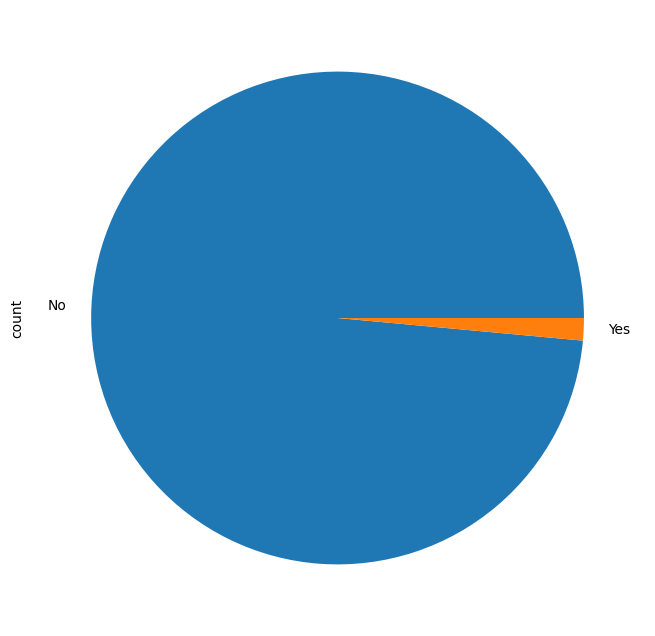

In [43]:
value_counts.plot.pie(figsize=(8,8))

In [61]:
df_travel[df_travel["Product Name"]== "Bronze Plan"] 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,44
22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,25
23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,34
120,C2B,Airlines,Online,Bronze Plan,No,20,SINGAPORE,47.00,11.75,30
121,C2B,Airlines,Online,Bronze Plan,No,29,SINGAPORE,27.00,6.75,30
...,...,...,...,...,...,...,...,...,...,...
63209,C2B,Airlines,Online,Bronze Plan,No,17,SINGAPORE,32.40,8.10,59
63210,C2B,Airlines,Online,Bronze Plan,No,17,SINGAPORE,32.40,8.10,63
63211,C2B,Airlines,Online,Bronze Plan,No,56,SINGAPORE,86.50,21.63,1
63212,C2B,Airlines,Online,Bronze Plan,No,56,SINGAPORE,86.50,21.63,27


In [41]:
df_travel[df_travel["Net Sales"]== 32.40] 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
45708,C2B,Airlines,Online,Bronze Plan,No,14,SINGAPORE,32.4,8.1,M,33
47211,C2B,Airlines,Online,Bronze Plan,No,18,SINGAPORE,32.4,8.1,F,62
47772,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,32.4,8.1,F,36
48818,C2B,Airlines,Online,Bronze Plan,No,18,SINGAPORE,32.4,8.1,F,25
51475,C2B,Airlines,Online,Bronze Plan,No,183,SINGAPORE,32.4,8.1,F,45
51628,C2B,Airlines,Online,Bronze Plan,No,27,SINGAPORE,32.4,8.1,F,53
51629,C2B,Airlines,Online,Bronze Plan,No,27,SINGAPORE,32.4,8.1,F,53
51630,C2B,Airlines,Online,Bronze Plan,No,27,SINGAPORE,32.4,8.1,F,50
51631,C2B,Airlines,Online,Bronze Plan,No,27,SINGAPORE,32.4,8.1,M,57
56990,C2B,Airlines,Online,Bronze Plan,No,9,SINGAPORE,32.4,8.1,F,17
